#### Step 1: Importare le librerie
#### Step 2: Caricare il dataset. Inserire il percorso del file CSV
#### Step 3: Visualizzare le prime righe del dataset
#### Step 4: Visualizzare il numero di righe e colonne
#### Step 5: Visualizzare i tipi di dati
#### Step 6: Statistiche descrittive

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\massi\PycharmProjects\siamoTesi\data\us_car_data.csv')

print(df.head())

print(f"Numero di righe e colonne: {df.shape}")

print(f"Tipi di dati:\n{df.dtypes}")

print(f"Statistiche descrittive:\n{df.describe()}")

      County       City State  Postal Code  Model Year    Make    Model  \
0   Thurston   Tumwater    WA        98512        2019   TESLA  MODEL 3   
1     Island    Clinton    WA        98236        2022  NISSAN     LEAF   
2  Snohomish  Snohomish    WA        98290        2020   TESLA  MODEL 3   
3       King    Seattle    WA        98134        2020   TESLA  MODEL 3   
4  Snohomish    Edmonds    WA        98020        2013   TESLA  MODEL S   

         Electric Vehicle Type  \
0  Battery Electric Vehicle      
1  Battery Electric Vehicle      
2  Battery Electric Vehicle      
3  Battery Electric Vehicle      
4  Battery Electric Vehicle      

                                                CAFV  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             220   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             266   
3            Clean Alternative Fuel Vehicle Eligible    

Elimino le colonne non necessarie, in particolare 'DOL Vehicle ID', 'Legislative District', 'Postal Code', '2020 Census Tract' sono dati irrilevanti. 'CAFV' è un dato descrittivo che si basa sull'autonomia (Battery Range). Infine 'Base MSRP' ha troppi valori nulli e comunque non ci interessa il prezzo base di un veicolo. Infine, verifico se lo stato è lo stesso per tutti i record.

In [5]:
df_cleaned = df.drop(columns=['DOL Vehicle ID', 'Legislative District', 'Postal Code', '2020 Census Tract', 'CAFV', 'Base MSRP'])

unique_states = df_cleaned['State'].nunique()  # Conta il numero di valori unici

if unique_states == 1:
    print(f"Tutti i record appartengono allo stesso stato: {df_cleaned['State'].unique()[0]}")
else:
    print(f"Il dataset contiene {unique_states} stati differenti: {df_cleaned['State'].unique()}")


Tutti i record appartengono allo stesso stato: WA


Dato che tutti i record hanno stato WA, eliminiamo la colonna in quanto superflua

In [6]:
df_cleaned = df_cleaned.drop(columns=['State'])  # Usa df_cleaned qui

print(df_cleaned.head())


      County       City  Model Year    Make    Model  \
0   Thurston   Tumwater        2019   TESLA  MODEL 3   
1     Island    Clinton        2022  NISSAN     LEAF   
2  Snohomish  Snohomish        2020   TESLA  MODEL 3   
3       King    Seattle        2020   TESLA  MODEL 3   
4  Snohomish    Edmonds        2013   TESLA  MODEL S   

         Electric Vehicle Type  Electric Range  \
0  Battery Electric Vehicle                220   
1  Battery Electric Vehicle                  0   
2  Battery Electric Vehicle                266   
3  Battery Electric Vehicle                322   
4  Battery Electric Vehicle                208   

                               Electric Utility   Longitude   latitude  
0                        PUGET SOUND ENERGY INC -122.913102  47.013593  
1                        PUGET SOUND ENERGY INC -122.359364  47.979655  
2                        PUGET SOUND ENERGY INC -122.091505  47.915555  
3  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) -122.329815  47.579810

Creiamo 3 grafici: 

`Auto per anno di produzione`: Un grafico a barre per mostrare quante auto sono state registrate ogni anno.

`Auto per marca e modello`: Un grafico a barre per visualizzare il numero di auto registrate suddivise per marca e modello.

`Auto per città`: Un grafico a barre per visualizzare il numero di auto registrate in ciascuna città.

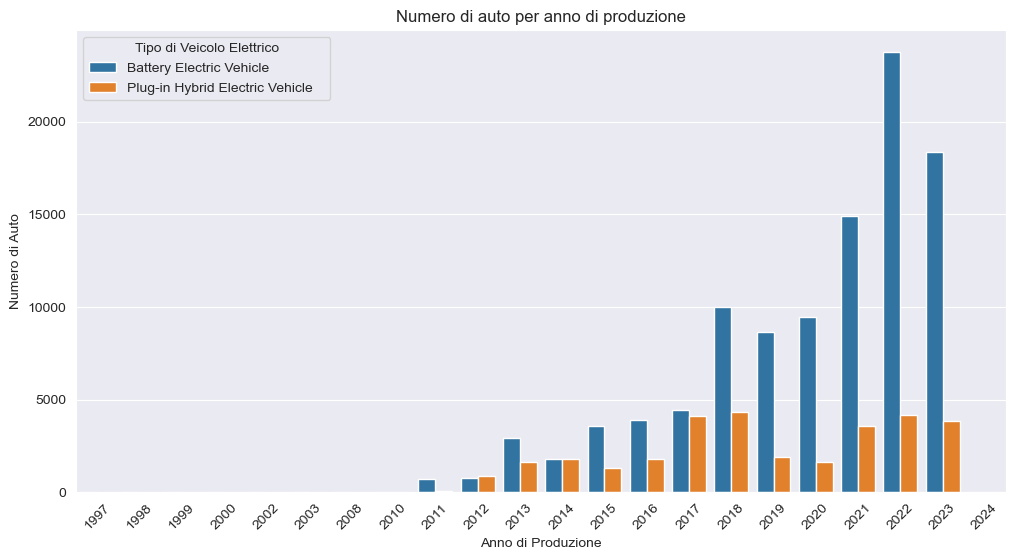

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Model Year', hue='Electric Vehicle Type')
plt.title('Numero di auto per anno di produzione')
plt.xlabel('Anno di Produzione')
plt.ylabel('Numero di Auto')
plt.xticks(rotation=45)
plt.legend(title='Tipo di Veicolo Elettrico')
plt.show()

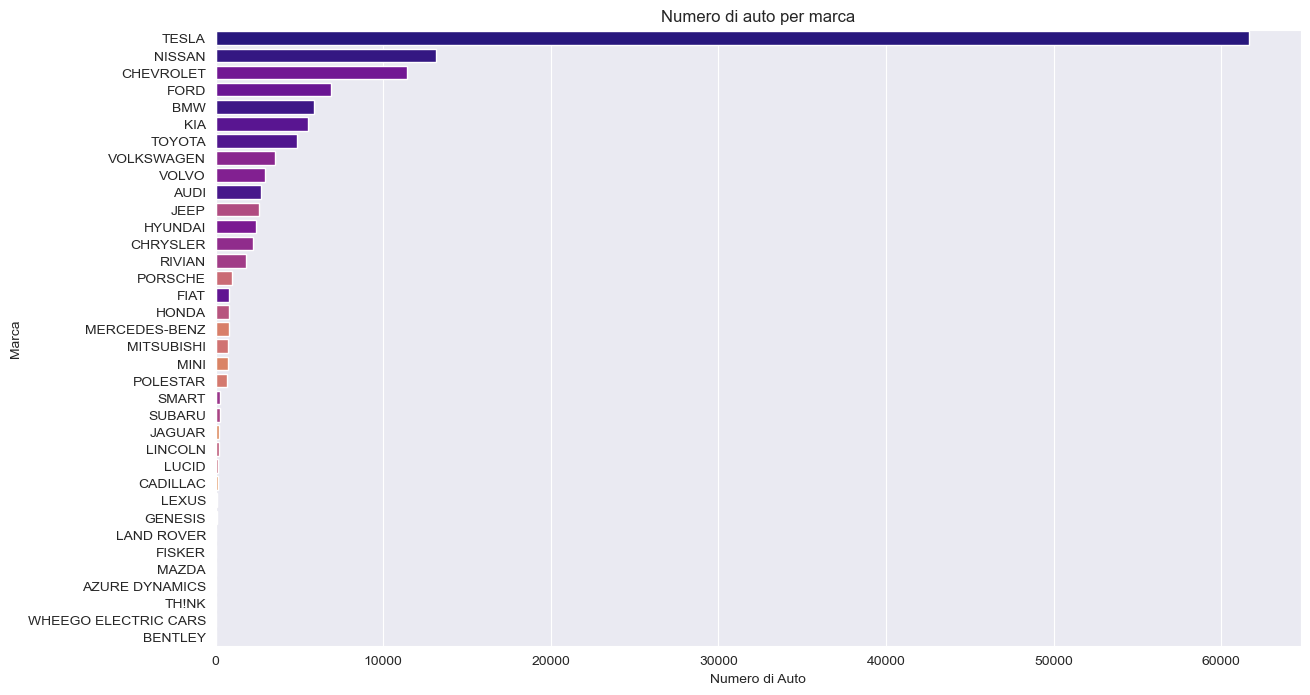

In [8]:
# Grafico 2: Numero di auto per marca
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Make', order=df_cleaned['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()


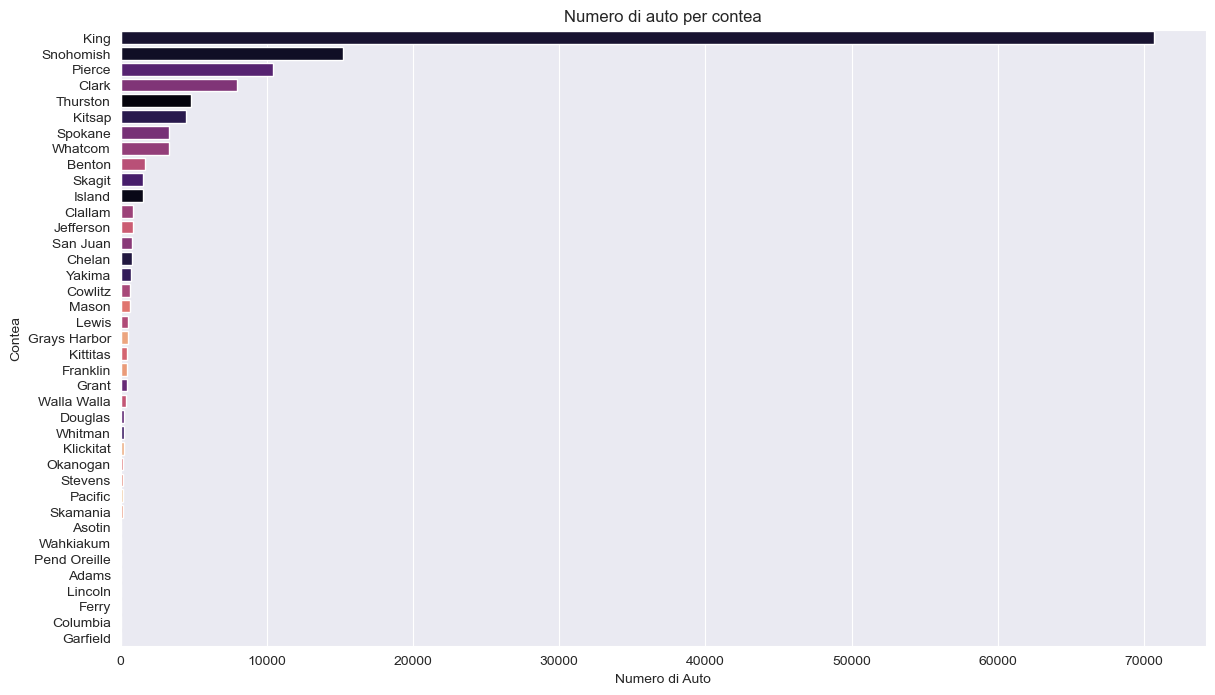

In [9]:
# Grafico 3: Numero di auto per contea
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='County', order=df_cleaned['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()

Dai grafici si evince che il mercato è dominato da alcuni marchi più popolari, che hanno venduto prevalmentemente negli ultimi anni. Inoltre, alcune contee sembrano avere più veicoli elettrici di altre. Di conseguenza andiamo a scremare il dataset, escludendo quei record che non raggiungono una certa soglia di popolarità del marchio e selezioniamo solo le 10 contee con più registrazioni.

In [10]:
# Seleziona le marche che hanno più di 100 veicoli registrati (puoi modificare la soglia in base alle tue necessità)
popular_brands = df_cleaned['Make'].value_counts()
popular_brands = popular_brands[popular_brands > 500].index  # Marche con più di 100 auto

# Filtrare il dataset per mantenere solo le auto delle marche popolari
df_filtered = df_cleaned[df_cleaned['Make'].isin(popular_brands)]


Prendo le prime 10 contee

In [11]:
top_10_counties = df_filtered['County'].value_counts().head(10).index  

# Filtrare il dataset per mantenere solo le auto delle prime 10 contee
df_filtered = df_filtered[df_filtered['County'].isin(top_10_counties)]

#print(df_filtered.head())

Rifaccio il grafico delle marche

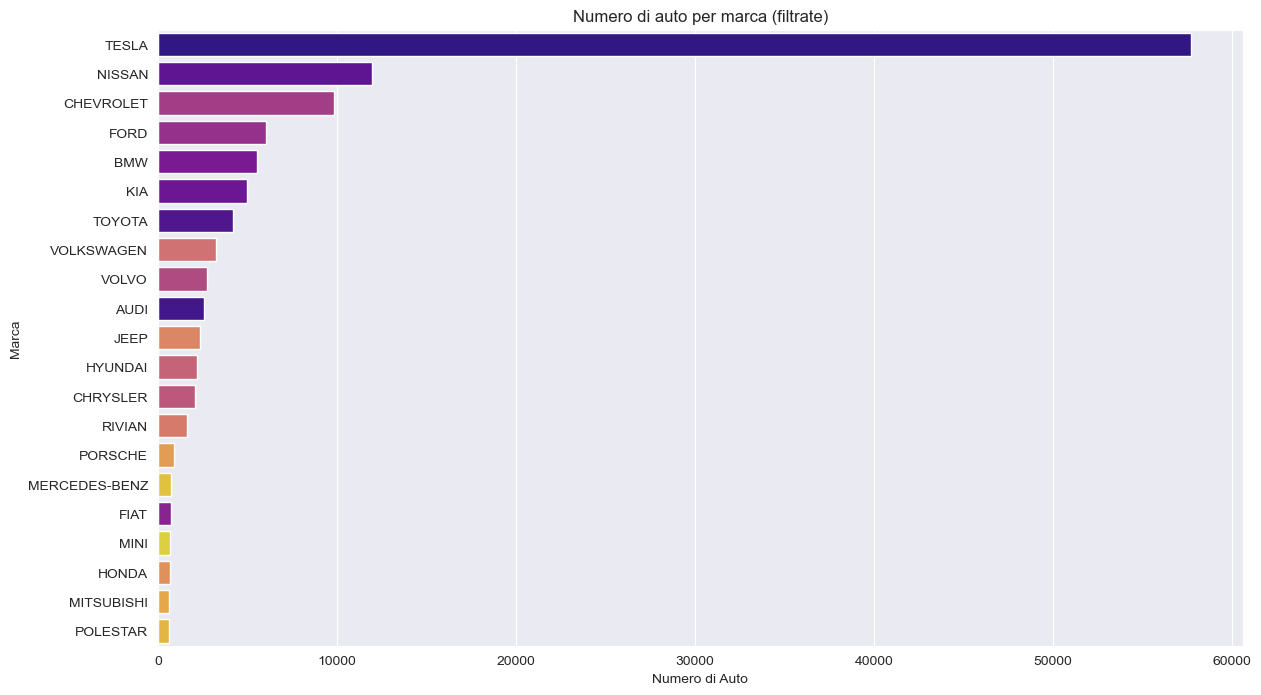

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='Make', order=df_filtered['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca (filtrate)')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()


Rifaccio il grafico delle contee

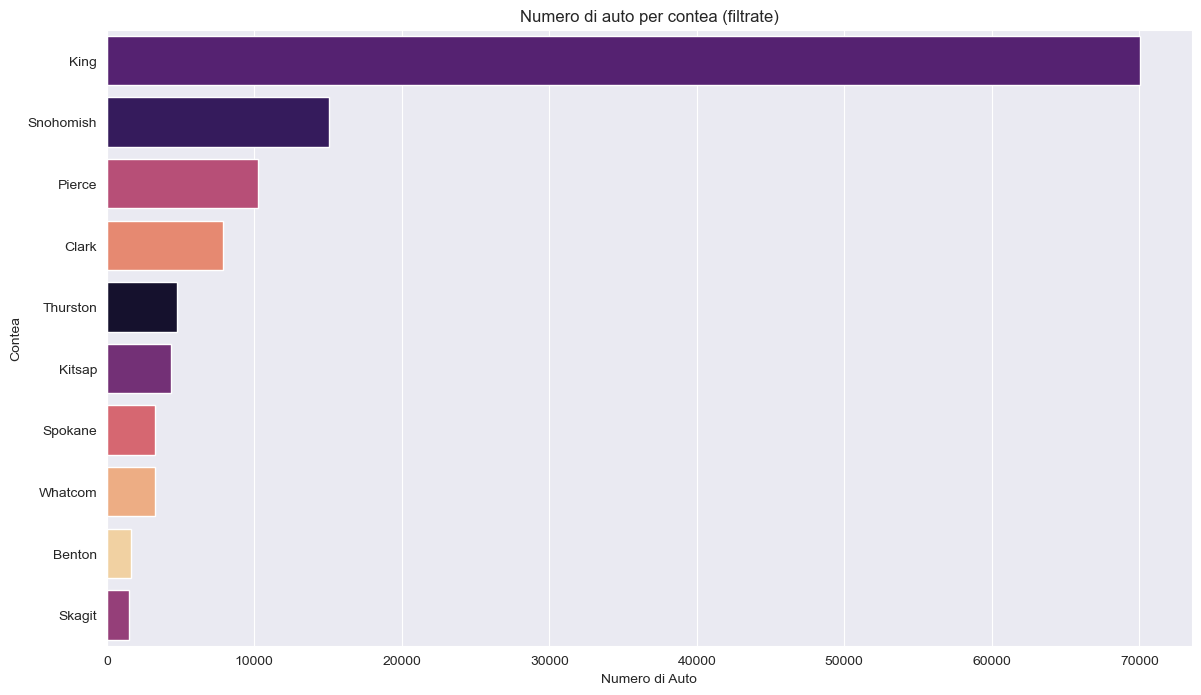

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='County', order=df_filtered['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea (filtrate)')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()


Calcolo quanti record ho rimosso

In [14]:
# Numero di righe nel dataset originale e in quello filtrato
rows_original = df.shape[0]
rows_filtered = df_filtered.shape[0]

# Calcolo della percentuale di dati rimossi
percentage_removed = ((rows_original - rows_filtered) / rows_original) * 100

# Stampa il numero di righe e colonne e la percentuale di dati rimossi
print(f"Numero di righe e colonne nel dataset originale: {df.shape}")
print(f"Numero di righe e colonne nel dataset filtrato: {df_filtered.shape}")
print(f"Percentuale di righe rimosse: {percentage_removed:.2f}%")

Numero di righe e colonne nel dataset originale: (134474, 17)
Numero di righe e colonne nel dataset filtrato: (122116, 10)
Percentuale di righe rimosse: 9.19%


Andiamo inoltre ad eliminare i valori nulli o zero dalle colonne rimaste nel dataset. 
Prima eliminiamo le righe che contengono valori nulli, poi quelle con valori pari a zero nelle colonne numeriche rilevanti (in questo caso l'autonomia elettrica).

Numero di righe e colonne dopo la pulizia: (69698, 10)


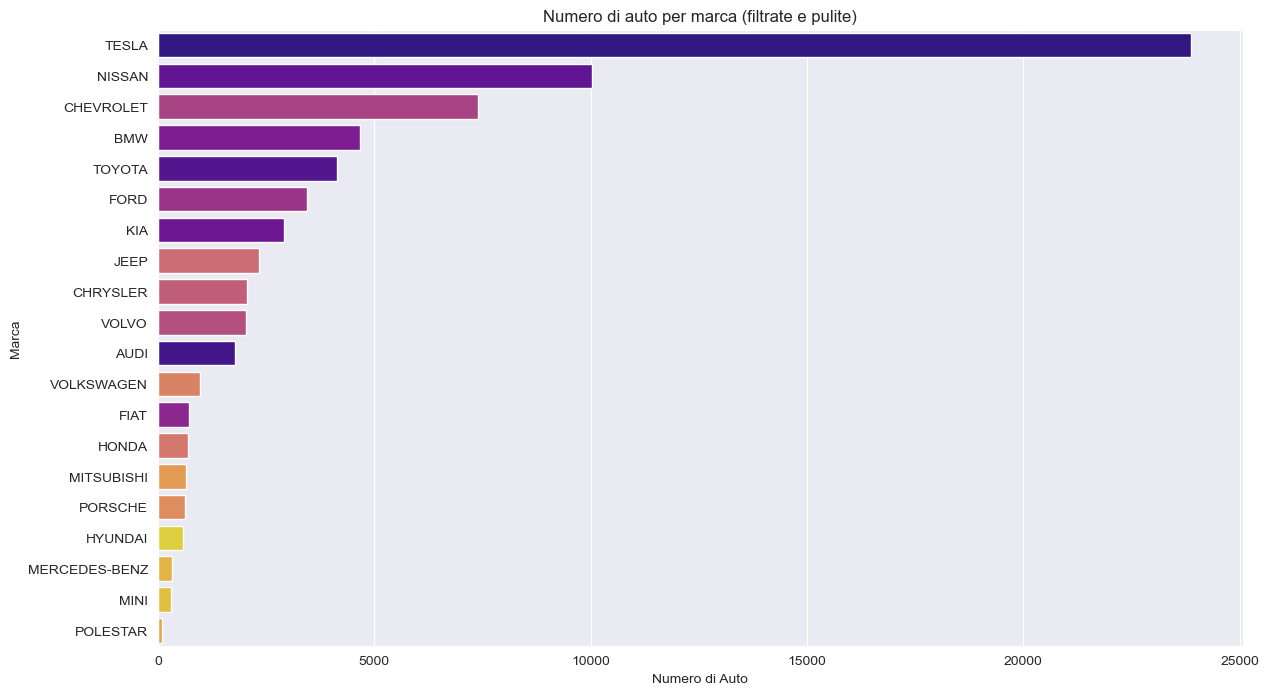

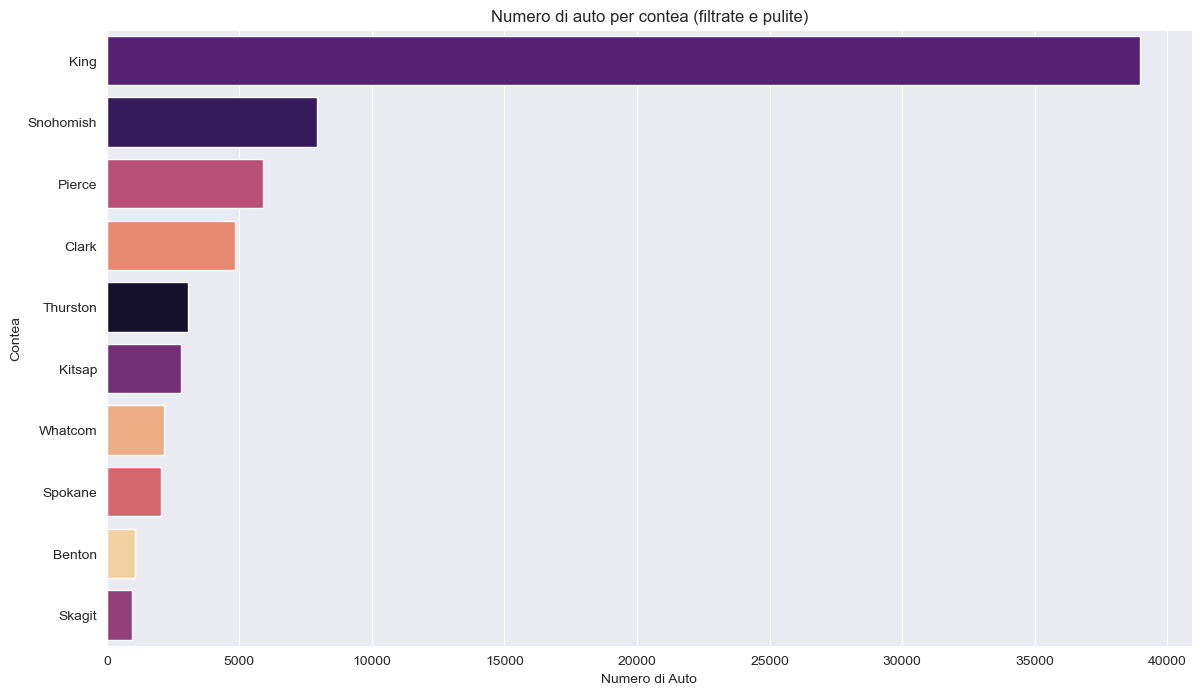

Numero di righe e colonne nel dataset originale: (134474, 17)
Numero di righe e colonne nel dataset pulito e filtrato: (69698, 10)
Percentuale di righe rimosse: 48.17%


In [15]:
# Rimozione dei valori nulli
df_filtered = df_filtered.dropna()

# Rimozione dei valori pari a zero nelle colonne numeriche rilevanti
df_filtered = df_filtered[(df_filtered['Electric Range'] > 0)]

# Stampa il numero di righe e colonne dopo la pulizia
print(f"Numero di righe e colonne dopo la pulizia: {df_filtered.shape}")

# Grafici aggiornati

# Grafico aggiornato per le marche
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='Make', order=df_filtered['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca (filtrate e pulite)')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()

# Grafico aggiornato per le contee
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='County', order=df_filtered['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea (filtrate e pulite)')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()

# Aggiornamento del calcolo delle righe rimosse
rows_cleaned = df_filtered.shape[0]
percentage_removed_cleaned = ((rows_original - rows_cleaned) / rows_original) * 100

# Stampa il numero di righe e la percentuale di righe rimosse
print(f"Numero di righe e colonne nel dataset originale: {df.shape}")
print(f"Numero di righe e colonne nel dataset pulito e filtrato: {df_filtered.shape}")
print(f"Percentuale di righe rimosse: {percentage_removed_cleaned:.2f}%")

Grafico 1: Distribuzione dell'autonomia elettrica (Electric Range)

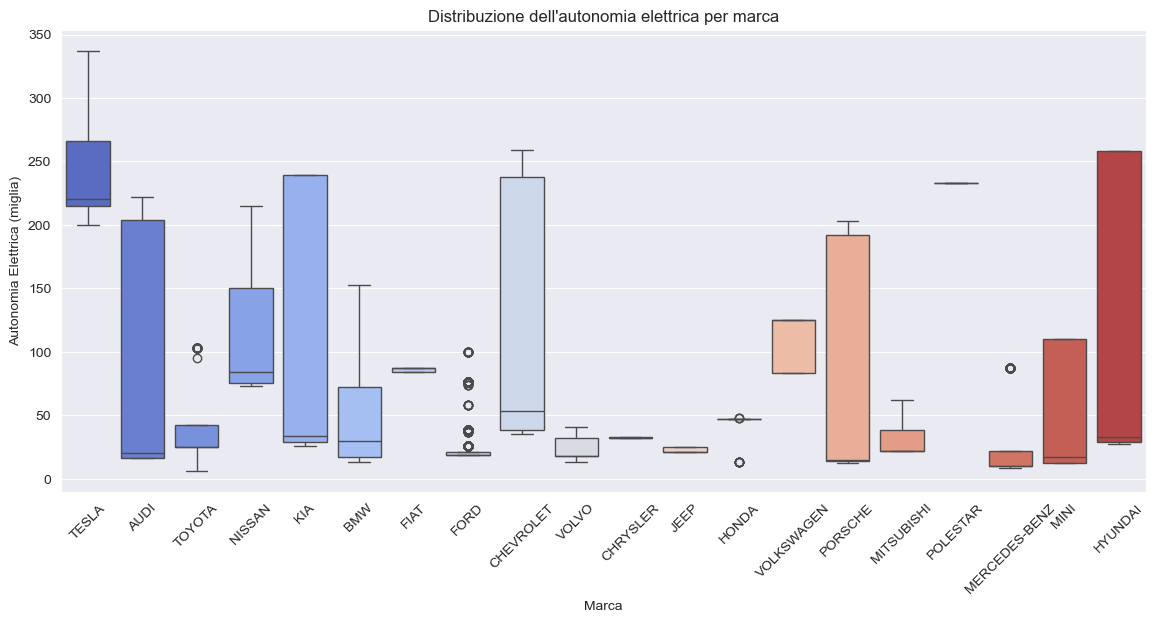

In [16]:
# Boxplot per mostrare la distribuzione dell'autonomia elettrica per marca
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='Make', y='Electric Range', palette='coolwarm', hue='Make')
plt.title('Distribuzione dell\'autonomia elettrica per marca')
plt.xlabel('Marca')
plt.ylabel('Autonomia Elettrica (miglia)')
plt.xticks(rotation=45)
plt.show()

Il boxplot rappresenta la distribuzione dell'autonomia elettrica (in miglia) per marca. Ogni scatola rappresenta i quartili di distribuzione per una marca specifica, e i pallini indicano potenziali outliers, ovvero valori che si discostano significativamente dal resto dei dati.

Spiegazione del Boxplot:
La scatola centrale (box) rappresenta i quartili dal 25° al 75° percentile. La linea orizzontale all'interno della scatola è la mediana (50° percentile), che indica il valore centrale della distribuzione.
Le “whiskers” (i baffi) sono le linee che si estendono dalla scatola, di solito fino a 1,5 volte l'intervallo interquartile (IQR) al di sopra e al di sotto della scatola. Qualsiasi punto al di fuori di queste linee viene considerato un outlier.
I pallini fuori dai baffi rappresentano appunto gli outliers, valori molto distanti dalla distribuzione principale.

Andiamo quindi a individuare gli outliers e ad evidenziarli meglio.

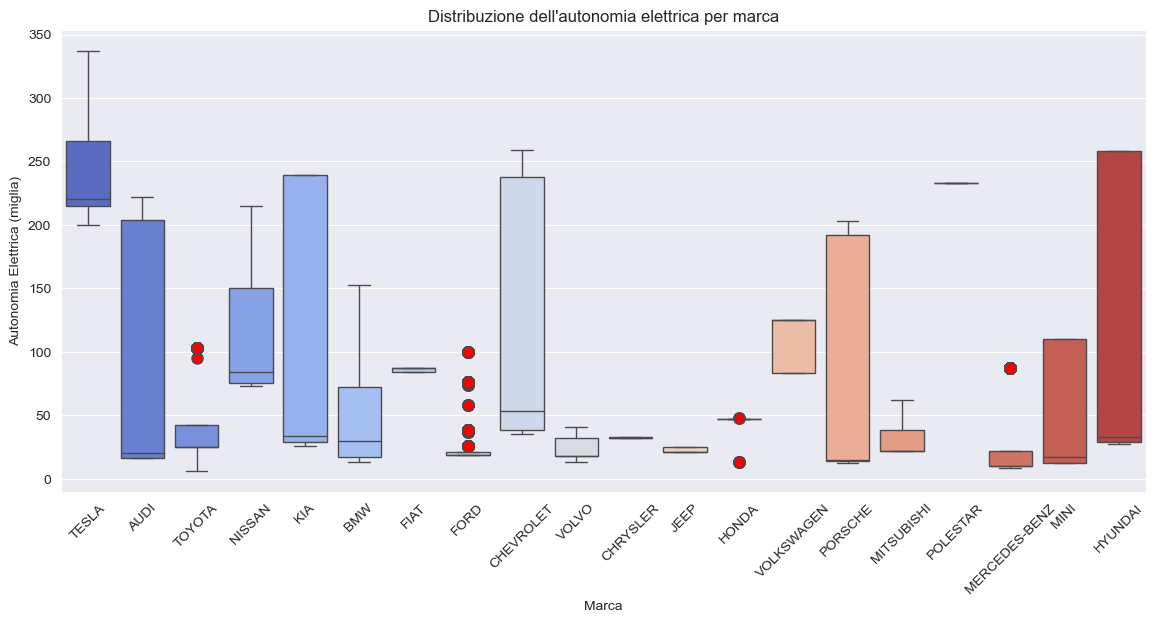

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='Make', y='Electric Range', palette='coolwarm', hue='Make', showfliers=True, flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Distribuzione dell\'autonomia elettrica per marca')
plt.xlabel('Marca')
plt.ylabel('Autonomia Elettrica (miglia)')
plt.xticks(rotation=45)
plt.show()

Andando ad analizzare il dataset, si può concludere che i modelli rappresentati dai punti in rosso non sono altro che modelli poco venduti che presentano un'autonomia particolarmente sopra la media (eccetto Honda) della marca.

Grafico 2: Tendenze nel tempo (numero di auto registrate per anno di produzione)

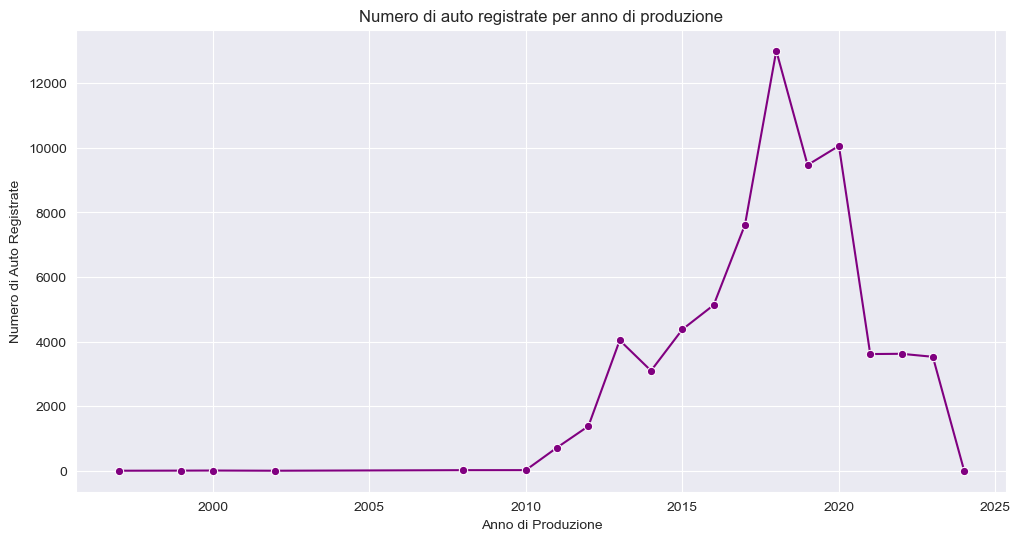

In [18]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered['Model Year'].value_counts().sort_index(), marker='o', color='purple')
plt.title('Numero di auto registrate per anno di produzione')
plt.xlabel('Anno di Produzione')
plt.ylabel('Numero di Auto Registrate')
plt.show()


In [19]:
#df_filtered.head()
print(df_filtered.columns)
print(df_filtered.dtypes)

Index(['County', 'City', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'Electric Range', 'Electric Utility',
       'Longitude', 'latitude'],
      dtype='object')
County                    object
City                      object
Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
Electric Range             int64
Electric Utility          object
Longitude                float64
latitude                 float64
dtype: object


In [20]:
unique_electric_utilities = df_filtered['Electric Utility'].nunique()
print(f"Numero di valori unici in 'Electric Utility': {unique_electric_utilities}")
print(df_filtered['Electric Utility'].unique())

Numero di valori unici in 'Electric Utility': 34
['PUGET SOUND ENERGY INC' 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)'
 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'
 'MODERN ELECTRIC WATER COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'
 'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF RICHLAND - (WA)'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||OHOP MUTUAL LIGHT COMPANY, INC|PENINSULA LIGHT COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)'
 'BONNEVILLE POWER ADMINISTRATION||INLAND POWER & LIGHT COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||LAKEVIEW LIG

In [21]:
utility_counts = df_filtered['Electric Utility'].value_counts()
print(utility_counts)

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                       26123
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                        14559
PUGET SOUND ENERGY INC                                                                                              14147
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                                     4720
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                      3548
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                                                   2050
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY                                           1169
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY                                                            634
MODERN 

In [22]:
# Top 3 utilities da mantenere invariate
top_3_utilities = [
    'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 
    'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 
    'PUGET SOUND ENERGY INC'
]

# Funzione per categorizzare le utilities
def categorize_utilities(utility):
    if utility in top_3_utilities:
        return utility
    elif 'BONNEVILLE POWER ADMINISTRATION' in utility:
        return 'BONNEVILLE POWER ADMINISTRATION'
    else:
        return 'OTHER'

# Applicare la funzione alla colonna "Electric Utility"
df_filtered['Electric Utility'] = df_filtered['Electric Utility'].apply(categorize_utilities)

# Verificare il risultato
print(df_filtered['Electric Utility'].value_counts())

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)    26123
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)     14559
PUGET SOUND ENERGY INC                           14147
BONNEVILLE POWER ADMINISTRATION                  11973
OTHER                                             2896
Name: count, dtype: int64


In [25]:
import folium
from folium.plugins import HeatMap

# Crea la mappa centrata sullo stato di Washington
map_washington = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

# Crea la lista delle coordinate per il heatmap
coordinates = df_filtered[['latitude', 'Longitude']].values.tolist()

# Aggiungi i punti sotto forma di HeatMap
HeatMap(coordinates, radius=8).add_to(map_washington)

# Mostra la mappa
map_washington.save("heatmap_vehicles.html")


#todo: inserire ultimi grafici mancanti, vedi https://www.kaggle.com/code/aymenmouffok/data-analysis-and-ev-type-prediction-99#Electric-Vehicle-Data-Analysis-and-Statistics-
#todo: iniziare con la discretizzazione delle variabili continue e convertire le variabili categoriche
#todo: scelgiere task di regressione/classificazione. Idee: Prevedere l'autonomia elettrica, Classificare il tipo di veicolo elettrico, Classificazione geografica